# A/B Testing 

You've received an analytical task from an international online store. Your predecessor failed to complete it: they launched an A/B test and then quit. They left only the technical specifications and the test results.

## Describe the goals of the study

The goal of this study is to determine whether the introduction of an improved recommendation system impacts the behavior and conversion of users on this international online store.

It is expected that with this improved recommendation system, users will show better conversion into product page views, instances of adding items to their shopping cart and purchases. Specifically, a 10% increase in conversion expected.

The paricipants of this study will be 15% of new users from the EU region that signed up between the dates of December 7th 2020 and December 21st 2020 (a 2 week time span) with an expected 6000 customers. 

In [26]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates
import seaborn as sns
from scipy import stats
import math
import matplotlib.dates as mdates
import datetime 
import math
import plotly.express as px


## Download the data

### Calender of marketing events for 2020

In [27]:
# read in the data and load into DataFrame
data = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
display(data)

marketing = data[data['name'] == 'Christmas&New Year Promo']
display(marketing)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03


This data displays the calender of marketing events for the year 2020. The only event that is applicable to this study (which runs from December 7th 2020 to January 1st 2021) is Christmas and New Years Promo which runs from Dec 25th 2020 to January 3rd 2021. For brevity, this event dataframe has been condensed to only contain this event. 

### Users who signed up in the online store from December 7 to 21, 2020

In [28]:
# read in the data and load into DataFrame
new_users = pd.read_csv('/datasets/final_ab_new_users_us.csv')

display(new_users)
new_users.info()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
61728,1DB53B933257165D,2020-12-20,EU,Android
61729,538643EB4527ED03,2020-12-20,EU,Mac
61730,7ADEE837D5D8CBBD,2020-12-20,EU,PC
61731,1C7D23927835213F,2020-12-20,EU,iPhone


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null object
region        61733 non-null object
device        61733 non-null object
dtypes: object(4)
memory usage: 1.9+ MB


This data contains all of the users who signed up for the online store from December 7th to December 21st 2020, including their region, sign up date, user id and device type. There are over 60,000 new users for that 2 week period. 

###  Events of new users within December 7, 2020 to January 1, 2021

This data contains all of the events of all of the new users who signed up from December 7th 2020 to January 1st 2021. Some of these users were within the two week sign up period and others were not. This data contains the user id, the datetime of when the event took place, the exact event that took place and any related details (the total amount in USD that the user spent if the event is a purchase one). 

In [29]:
# read in the data and load into DataFrame
events = pd.read_csv('/datasets/final_ab_events_us.csv')
display(events)
events.info()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null object
event_name    440317 non-null object
details       62740 non-null float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


### Test participants

In [30]:
# read in the data and load into DataFrame
test_participants = pd.read_csv('/datasets/final_ab_participants_us.csv')
display(test_participants)
test_participants.info()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test
18264,3DE51B726983B657,A,interface_eu_test
18265,F501F79D332BE86C,A,interface_eu_test
18266,63FBE257B05F2245,A,interface_eu_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
user_id    18268 non-null object
group      18268 non-null object
ab_test    18268 non-null object
dtypes: object(3)
memory usage: 428.3+ KB


This data contains the test participants with their user ID, the group that the user belonged to (group A being control group and group B being the new payment funnel group), and the name of the AB test that was run on that user. These 20,000 users comprise of the 15% of new users from the EU region. 

## Explore the data

### Do types need to be converted?

In [31]:
# marketing dataframe - convert dates to datetime objects
marketing['start_dt'] = pd.to_datetime(marketing['start_dt'], format="%Y-%m-%d")
marketing['finish_dt'] = pd.to_datetime(marketing['finish_dt'], format="%Y-%m-%d")

# new_users dataframe - convert dates to datetime objects
new_users['first_date'] = pd.to_datetime(new_users['first_date'], format="%Y-%m-%d")
new_users = new_users.rename(columns={'first_date': 'join_date'})

# events dataframe - convert dates to datetime objects
events['event_dt'] = pd.to_datetime(events['event_dt'], format="%Y-%m-%d %H:%M:%S")
events = events.rename(columns={'details': 'purchase_amount'})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Only dates needed to be converted into proper date time objects, as well as some column rename for clarity.

### Are there any missing or duplicate values?

In [32]:
# drop any duplicate rows
new_users.drop_duplicates(inplace=True)
events.drop_duplicates(inplace=True)
test_participants.drop_duplicates(inplace=True)

# missing values
events['purchase_amount'] = events['purchase_amount'].fillna(0.00)
display(events)

,user_id,event_dt,event_name,purchase_amount
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,0.00
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,0.00
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,0.00
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,0.00


Duplicate rows were dropped and missing values from the events purchase_amount column were changed from NaN to 0.00.

## Carry out exploratory data analysis

### Find the number of users who performed each of these actions. 

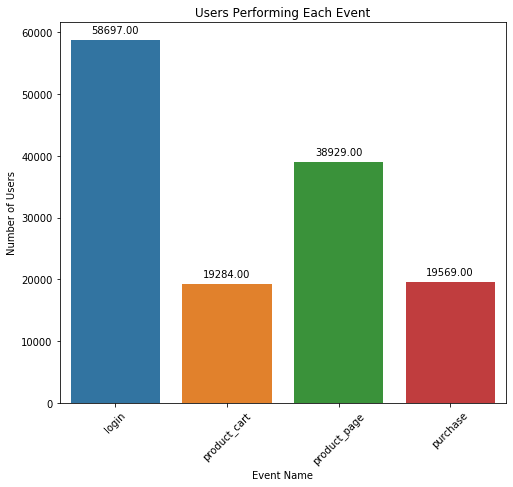

In [33]:
events_count = events.groupby('event_name').agg({'user_id':'nunique'}).reset_index()

# plot bar graph
plt.figure(figsize=(8, 7))
ax = sns.barplot(data = events_count, x='event_name', y='user_id')

# Add titles and captions
plt.title('Users Performing Each Event')
plt.xlabel('Event Name')
plt.ylabel('Number of Users')

# label bars with data
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
# rotate x axis labels
for item in ax.get_xticklabels():
    item.set_rotation(45)

plt.show()

To find the number of unique users who performed every event, you can aggregate the events by unique user id. As the graph shows, login is the most frequently done event, then product page, purchase and then product cart. Interestingly, more users make a direct purchase than view the products in their cart. 

### Study conversion at different stages of the funnel.

### Find the number of users who performed each of these actions.

In [34]:
# query only ab_test for interface_eu_test
test_participants_interface = test_participants[test_participants['ab_test'] == 'interface_eu_test']

# merge test_participants_interface and events into one big table
participants_events = pd.merge(test_participants_interface, events, on='user_id')

# find the number of users who performed each event
eventUsers = participants_events.groupby('event_name')['user_id'].nunique().sort_values(ascending=False) #/ new_data.user_id.nunique()
eventUsers = eventUsers.reset_index()
eventUsers.columns = ['event_name', 'user_unique']
eventUsers['user_percentage'] = (eventUsers['user_unique'] / participants_events.user_id.nunique()) * 100

# calculate the ratio of how many users performaed the event at least once
# count the number of event timestamps for each user for each event
at_least_once = participants_events.groupby(['user_id', 'event_name'])['event_dt'].count().reset_index()

# extract only the users who had more than one timestamp per event
at_least_once = at_least_once[at_least_once['event_dt'] > 1]

# count how many unique users had more than one action per event compared to all unique users
at_least_once = at_least_once.groupby('event_name')['user_id'].nunique() / participants_events.groupby('event_name')['user_id'].nunique()
at_least_once = at_least_once.reset_index()
at_least_once.columns = ['event_name', 'at_least_once_percentage']
at_least_once['at_least_once_percentage'] = at_least_once['at_least_once_percentage'] * 100

# merge table together
eventUsers = eventUsers.merge(at_least_once, on='event_name')
display(eventUsers)

,event_name,user_unique,user_percentage,at_least_once_percentage
0,login,10849,99.990783,92.275786
1,product_page,7166,66.046083,92.143455
2,purchase,3713,34.221198,91.731753
3,product_cart,3568,32.884793,91.872197


This table above shows the number of unique users who performed each of the events along with the proportion of users who performed these actions at least once. 

### Use the event funnel to find the share of users that proceed from each stage to the next.

In [35]:
#create funnel of unique users for each event
funnel = participants_events.groupby('event_name')['user_id'].nunique().reset_index().sort_values(by='user_id', ascending=False)

# create percentage change from one funnel to another 
funnel['percentage_change'] = funnel['user_id'].pct_change() * 100

# merge table together
eventUsers = eventUsers.merge(funnel, on='event_name')
eventUsers =eventUsers.fillna(0)
eventUsers = eventUsers[['event_name', 'percentage_change']]
display(eventUsers)

,event_name,percentage_change
0,login,0.000000
1,product_page,-33.947829
2,purchase,-48.185878
3,product_cart,-3.905198


In the table above, we can see each event name, we can see the share of users that proceed from one stage to another. All of the users start out logging in, then there is a 34% decrease in users who proceeded to view products. From there, there was a 48% decrease in users who proceeded in actually making a purchase. The purchase stage is the one that lost the most users.

### Is the number of events per user distributed equally among the samples?

,group,event_name,event_count
0,A,login,17754
1,A,product_cart,5766
2,A,product_page,11750
3,A,purchase,6300
4,B,login,17391
5,B,product_cart,5836
6,B,product_page,11345
7,B,purchase,5785


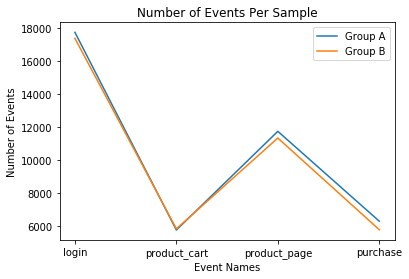

In [36]:
# query only ab_test for interface_eu_test
test_participants_interface = test_participants[test_participants['ab_test'] == 'interface_eu_test']

# merge test_participants_interface and events into one big table
participants_events = pd.merge(test_participants_interface, events, on='user_id')
#display(participants_events)

# count number of events per event per group
events_per_user = participants_events.groupby(['group','event_name']).count()
events_per_user = events_per_user.reset_index()
events_per_user = events_per_user[['group', 'event_name', 'user_id']]
events_per_user.columns = ['group', 'event_name', 'event_count']
display(events_per_user)

# line graph - extract names
event_names = np.array(events_per_user['event_name'][0:4])
group_a_event_count = np.array(events_per_user['event_count'][0:4])
group_b_event_count = np.array(events_per_user['event_count'][4:8])

# plot graph
fig, ax = plt.subplots()
ax.plot(event_names, group_a_event_count, label="Group A")
ax.plot(event_names, group_b_event_count, label="Group B")
ax.set_title('Number of Events Per Sample')
ax.set_xlabel('Event Names')
ax.set_ylabel('Number of Events')
ax.legend()
plt.show()

As per the line graph, the number of events per user is mostly distributed equally among group A (control) and group B (interface group). Group B contains slightly more samples for events login, product page and purchase. Group A contains slightly less samples for events product cart. 

### Are there users who are present in both samples?

In [37]:
group_a = participants_events[participants_events['group'] == 'A']
group_b = participants_events[participants_events['group'] == 'B']

doubles = pd.merge(group_a, group_b, on='user_id')
display(doubles)

,user_id,group_x,ab_test_x,event_dt_x,event_name_x,purchase_amount_x,group_y,ab_test_y,event_dt_y,event_name_y,purchase_amount_y


There are not any users who are present in both samples since the merge of group A users and group B users yields empty.

### How is the number of events distributed among days?

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Events')

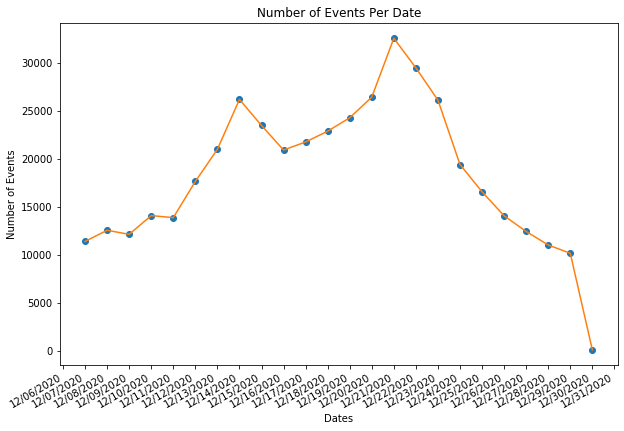

In [38]:
# add date only column
events['event_date'] = events['event_dt'].dt.date

# group by event name and date, aggregate count of event per date
event_dates = events.groupby(['event_date']).count()
event_dates = event_dates.reset_index()
event_dates = event_dates[['event_date', 'user_id']]
event_dates.columns = ['event_date', 'event_count']

# line graph
plt.figure(figsize=(10,7))
dates = matplotlib.dates.date2num(event_dates['event_date'])
plt.plot_date(dates, event_dates['event_count'])
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(matplotlib.dates.DayLocator())
plt.plot(dates, event_dates['event_count'])
plt.gcf().autofmt_xdate()
plt.title('Number of Events Per Date')
plt.xlabel('Dates')
plt.ylabel('Number of Events')

This graph displays the number of events per date between December 7th to December 31st. The timeline starts strong with a little over 10000 events on Dec 7th (probably those who prepare in advance for the holiday season), spikes all that way to about 25000 events on Dec 13th (probably those who realize that the holiday season is in swing), then the number of events dips before reaching an all time high of over 30000 events on Dec 21st (probably those realizing that they will be late with their presents), and then finishing the holiday season by slowly decreasing in events per day until it reaches 0 on Dec 30th. 

### Are there any peculiarities in the data that you have to take into account before starting the A/B test?

I  did not find any peculiarities in the data.

## Evaluate the A/B test results

### Test whether the recommendation system yields better conversion.

In [39]:
# calculate how manytusers in each group
usersExp = participants_events.groupby('group')['user_id'].nunique().reset_index()
usersExp.columns = ['exp_id', 'unique_users']
display(usersExp)

# create a pivot table with the number of unique users in each gorup that goes through each action
expGroups = participants_events.pivot_table(index='event_name', values='user_id', columns='group', aggfunc=lambda x: x.nunique()).reset_index()
expGroups.columns = ['event_name', 'group_a', 'group_b']
expGroups = expGroups.sort_values(by='group_a', ascending=False)
display(expGroups)

# The most important event is purchase
purchase = expGroups[expGroups['event_name'] == 'purchase']
purchase.columns = ['event_name', 'group_a_performed', 'group_b_performed']

# calculate share 
purchase['group_a_share'] = purchase['group_a_performed'] / usersExp.loc[0,'unique_users'] * 100
purchase['group_b_share'] = purchase['group_b_performed'] / usersExp.loc[1,'unique_users'] * 100

display(purchase)

,exp_id,unique_users
0,A,5467
1,B,5383


,event_name,group_a,group_b
0,login,5466,5383
2,product_page,3639,3527
3,purchase,1931,1782
1,product_cart,1756,1812


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,event_name,group_a_performed,group_b_performed,group_a_share,group_b_share
3,purchase,1931,1782,35.321017,33.104217


To test whether the recommendation system yields better conversion, this was done in 3 steps.

In step 1, I calculated the number of unique users present in both groups. As the first table shows, the control group A has slightly more users than the improved recommendation system group B. 

In step 2, I calculated the number of unique users who completed each event in the funnel per group. As the second table shows, group A has more users in each event with exception to the product cart event which group B has more users in. This could be because group A has more users than group B.

In step 3, I calculated the share of unique users who completed the purchase event. As we saw in step 2, there were more users in group A who completed this event than in group B. From those numbers alone, we cannot determine anything. Only in comparing to the entire group population and determining the share can we see that 35% of users in group A converted (made a purchase), while about 33% of users in group B converted. 

### Use a z-test to check the statistical difference between the proportions.

In [41]:
expGroups = participants_events.pivot_table(index='event_name', values='user_id', columns='group', aggfunc=lambda x: x.nunique()).reset_index()
group1 = 'A'
group2 = 'B'
alpha = 0.05

# find statistical significance for each group for each event
for event in expGroups.event_name.unique():

    # define successes 
    successes1 = expGroups[expGroups.event_name == event][group1].iloc[0]
    successes2 = expGroups[expGroups.event_name == event][group2].iloc[0]

    # define trials
    trials1 = participants_events[participants_events.group == group1]['user_id'].nunique()
    trials2 = participants_events[participants_events.group == group2]['user_id'].nunique()

    # proportion for success in group 1
    p1 = successes1 / trials1

    # proportion for success in group 2
    p2 = successes2 / trials2

    # proportion in a combined dataset
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    # define difference and z value
    difference = p1 - p2
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # calculate distribution
    distr = stats.norm(0,1)

    # calculate p_value
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p_value: ', p_value)
    if (p_value < alpha):
        print("Reject H0 for",event, 'and groups ',group1,' and ', group2, '\n')
    else:
        print("Fail to Reject H0 for", event,'and groups ',group1,' and ', group2, '\n')

p_value:  0.32103485047255065
Fail to Reject H0 for login and groups  A  and  B 

p_value:  0.08746918913258162
Fail to Reject H0 for product_cart and groups  A  and  B 

p_value:  0.2518419682737163
Fail to Reject H0 for product_page and groups  A  and  B 

p_value:  0.014959088807690257
Reject H0 for purchase and groups  A  and  B 



Having 2 different experiment groups, it is important to ensure that that the results from these groups are based on fair numbers. In order to do so, we want to check if there is a statistically significant difference between all of the groups. If we find that there is a significant difference, then the control groups have not be split up equally and any results we deduct will not accurately represent the population.

We want to test the statistical significance of the difference in conversion between groups A and B. This can be done using the CDF function which returns the expected probability for observing a value (number of unique users per event in group A) less than or equal to a given value (number of unique users per event in group B).

Null Hypothesis H0: There is no statistically significant difference in conversion between groups A and B. 
Alternative Hypothesis H1: There is a statistically significant difference in conversion between groups A and B.

For the events login, product page and product cart, the p_value is greater than the defined alpha level of 0.05 which means that we cannot reject the null hypothesis and we determine that there is a statistically significant difference between the two control groups for each event. 

For the purchase event, the p_value is less than the defined alpha level of 0.05 which means that we can reject the null hypothesis and we determine that there is not a statistically significant difference between the two control groups for the purchase event. 

## Describe your conclusions regarding the EDA stage and the A/B test results.

The goal of this study was to determine whether the introduction of an improved recommendation system impacts conversion of users on this international online store. It was expected that with this improved recommendation system, users will show a 10% increase in conversion.

From exploratory data analysis, it was found that 35% of users in group A (the control group) converted (made a purchase) while 33% of users in group B (the improved recommendation systerm) converted. This data suggests that the improved recommendation system did not lead to an increase in conversion but in fact led to a slight decrease in conversion.

From AB testing, it was found that there was a statistically significant difference between groups A and B for login, product page view and product cart view. The recommendation system worked for these events. However, for the purchase event, it was determined that there is not a statistically significant difference between the two control groups for the purchase event. 

As a result, the analysis of the data suggests not to apply the improved recommendation system to the international online store. Perhaps the store should stick with its current model or enhance the recommendation system. 